##Chapter 03 - Classification

# Chapter 3: Classification

Chapter ini membahas classification, salah satu tugas paling fundamental dalam supervised learning. Classification bertujuan memprediksi label diskrit (kelas) berdasarkan fitur input, berbeda dengan regresi yang memprediksi nilai kontinu.

Dalam chapter ini, dataset **MNIST** digunakan sebagai studi kasus utama untuk menjelaskan:
- binary classification
- multiclass classification
- multilabel dan multioutput classification
- serta berbagai metrik evaluasi classifier secara mendalam.


## 1. What Is Classification?

Classification adalah jenis supervised learning di mana model belajar memetakan input ke dalam **kategori atau kelas tertentu**.
Contoh umum classification meliputi:
- email spam vs non-spam
- diagnosis penyakit (positif / negatif)
- pengenalan wajah
- pengenalan digit tulisan tangan

Tantangan utama dalam classification bukan hanya membuat model yang akurat,
tetapi juga **mengevaluasi kesalahan yang dibuat model** dengan metrik yang tepat.


## 2. The MNIST Dataset

MNIST adalah dataset klasik dalam Machine Learning yang berisi **70.000 gambar digit tulisan tangan**
dari angka 0 sampai 9.

Setiap gambar:
- berukuran 28 × 28 piksel
- direpresentasikan sebagai vektor berdimensi 784
- nilai piksel berkisar dari 0 hingga 255

MNIST sering digunakan sebagai dataset pembelajaran karena sederhana,
namun cukup kompleks untuk menunjukkan tantangan nyata dalam classification.


In [8]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

mnist = fetch_openml("mnist_784", version=1, as_frame=True)
X = mnist.data
y = mnist.target.astype(np.uint8)

X.shape, y.shape

((70000, 784), (70000,))

## 3. Visualizing a Digit

Sebelum melatih model, penting untuk memahami bagaimana data direpresentasikan.
Vektor berdimensi 784 dapat diubah kembali menjadi gambar 28 × 28 untuk divisualisasikan.

Visualisasi ini membantu:
- memverifikasi data
- memahami variasi tulisan tangan
- membangun intuisi terhadap dataset


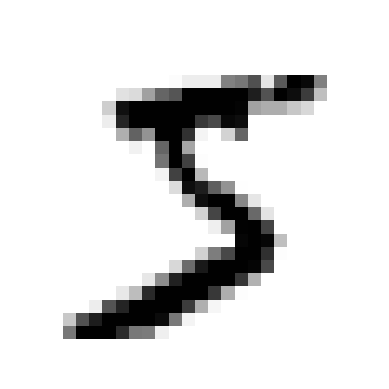

np.uint8(5)

In [9]:
some_digit = X.iloc[0].values
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

y.iloc[0]

## 4. Train–Test Split

Untuk mengevaluasi performa model secara objektif,
dataset dibagi menjadi:
- **training set** untuk melatih model
- **test set** untuk evaluasi akhir

Pada MNIST:
- 60.000 data pertama digunakan sebagai training set
- 10.000 data terakhir sebagai test set

In [10]:
X_train, X_test = X.iloc[:60000], X.iloc[60000:]
y_train, y_test = y.iloc[:60000], y.iloc[60000:]

## 5. Binary Classification: Detecting the Digit 5

Sebagai pengantar classification,
masalah disederhanakan menjadi binary classificatio*:
mendeteksi apakah sebuah digit adalah angka 5 atau bukan.

Pendekatan ini memudahkan pemahaman konsep dasar classifier dan evaluasinya.

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## 6. Training an SGD Classifier

Stochastic Gradient Descent (SGD) adalah algoritma optimisasi yang efisien
untuk dataset besar seperti MNIST.

SGDClassifier sangat cocok digunakan untuk linear classifier pada data berskala besar.

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## 7. Evaluating the Classifier Using Accuracy

Accuracy mengukur proporsi prediksi yang benar.
Namun pada dataset tidak seimbang,
accuracy dapat memberikan gambaran yang menyesatkan.


In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

## 8. Confusion Matrix

Confusion matrix menunjukkan jumlah:
- True Positive
- True Negative
- False Positive
- False Negative

Metrik ini membantu memahami jenis kesalahan yang dibuat classifier.

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)


## 9. Precision and Recall

Precision mengukur ketepatan prediksi positif,
sedangkan recall mengukur kemampuan model mendeteksi semua instance positif.


In [23]:
from sklearn.model_selection import cross_val_predict

# Membuat prediksi menggunakan cross-validation
y_train_pred = cross_val_predict(
    sgd_clf,
    X_train,
    y_train_5,
    cv=3
)


In [24]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)

precision, recall


(0.8370879772350012, 0.6511713705958311)

## 10. The F1 Score

F1-score adalah rata-rata harmonik dari precision dan recall.
Metrik ini digunakan ketika keseimbangan antara precision dan recall diperlukan.


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)


## 11. Precision–Recall Trade-off

Dengan mengubah threshold keputusan,
classifier dapat menukar precision dengan recall sesuai kebutuhan aplikasi.


In [25]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve


y_scores = cross_val_predict(
    sgd_clf, X_train, y_train_5, cv=3, method="decision_function"
)

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


In [26]:
y_scores = cross_val_predict(
    sgd_clf,
    X_train,
    y_train_5,
    cv=3,
    method="decision_function"
)


In [27]:
precisions, recalls, thresholds = precision_recall_curve(
    y_train_5,
    y_scores
)

precisions[:5], recalls[:5], thresholds[:5]


(array([0.09035   , 0.09035151, 0.09035301, 0.09035452, 0.09035602]),
 array([1., 1., 1., 1., 1.]),
 array([-146348.56726174, -142300.00705404, -137588.97581744,
        -137155.6264409 , -136254.05856216]))

## 12. The ROC Curve

ROC Curve memplot True Positive Rate terhadap False Positive Rate
pada berbagai threshold keputusan.


In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


## 13. Multiclass Classification

MNIST secara alami merupakan masalah multiclass
karena memiliki 10 kelas digit (0–9).


In [29]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

## 14. Error Analysis

Analisis kesalahan dilakukan menggunakan confusion matrix multiclass
untuk mengidentifikasi pola kesalahan sistematis.


In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict


In [32]:
y_train_pred = cross_val_predict(
    sgd_clf,
    X_train,
    y_train,
    cv=3
)


In [33]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]])

In [34]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx


array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]])

## 15. Multilabel Classification

Dalam multilabel classification,
satu instance dapat memiliki lebih dari satu label secara bersamaan.


In [18]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd]

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)


KNeighborsClassifier()

## 16. Multioutput Classification

Multioutput classification adalah generalisasi multilabel classification
di mana setiap label memiliki lebih dari dua kemungkinan nilai.


## Closing Summary (Chapter 3)

Chapter ini menekankan bahwa classification tidak hanya tentang membangun model,
tetapi juga memahami perilaku dan kesalahan classifier.

Melalui berbagai metrik evaluasi dan jenis classification,
pembaca dibekali fondasi penting untuk melanjutkan ke model yang lebih kompleks
pada chapter berikutnya.
